In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle
import warnings
import tensorflow as tf

In [2]:
warnings.filterwarnings("ignore")

data = pd.read_csv(r"C:\Users\matas\OneDrive\Desktop\alzheimer's classification\alzheimers_prediction_dataset.csv")

print(data.head())

        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy                   High      

In [3]:

data.rename(columns={'Alzheimer’s Diagnosis': 'alz_diag'}, inplace=True)

numerical_features = [col for col in data.columns if data[col].dtypes != 'object']
categorical_features = [col for col in data.columns if data[col].dtypes == 'object']

for col in categorical_features:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

In [4]:
data['feature_sum'] = data[numerical_features].sum(axis=1)
data['feature_mean'] = data[numerical_features].mean(axis=1)

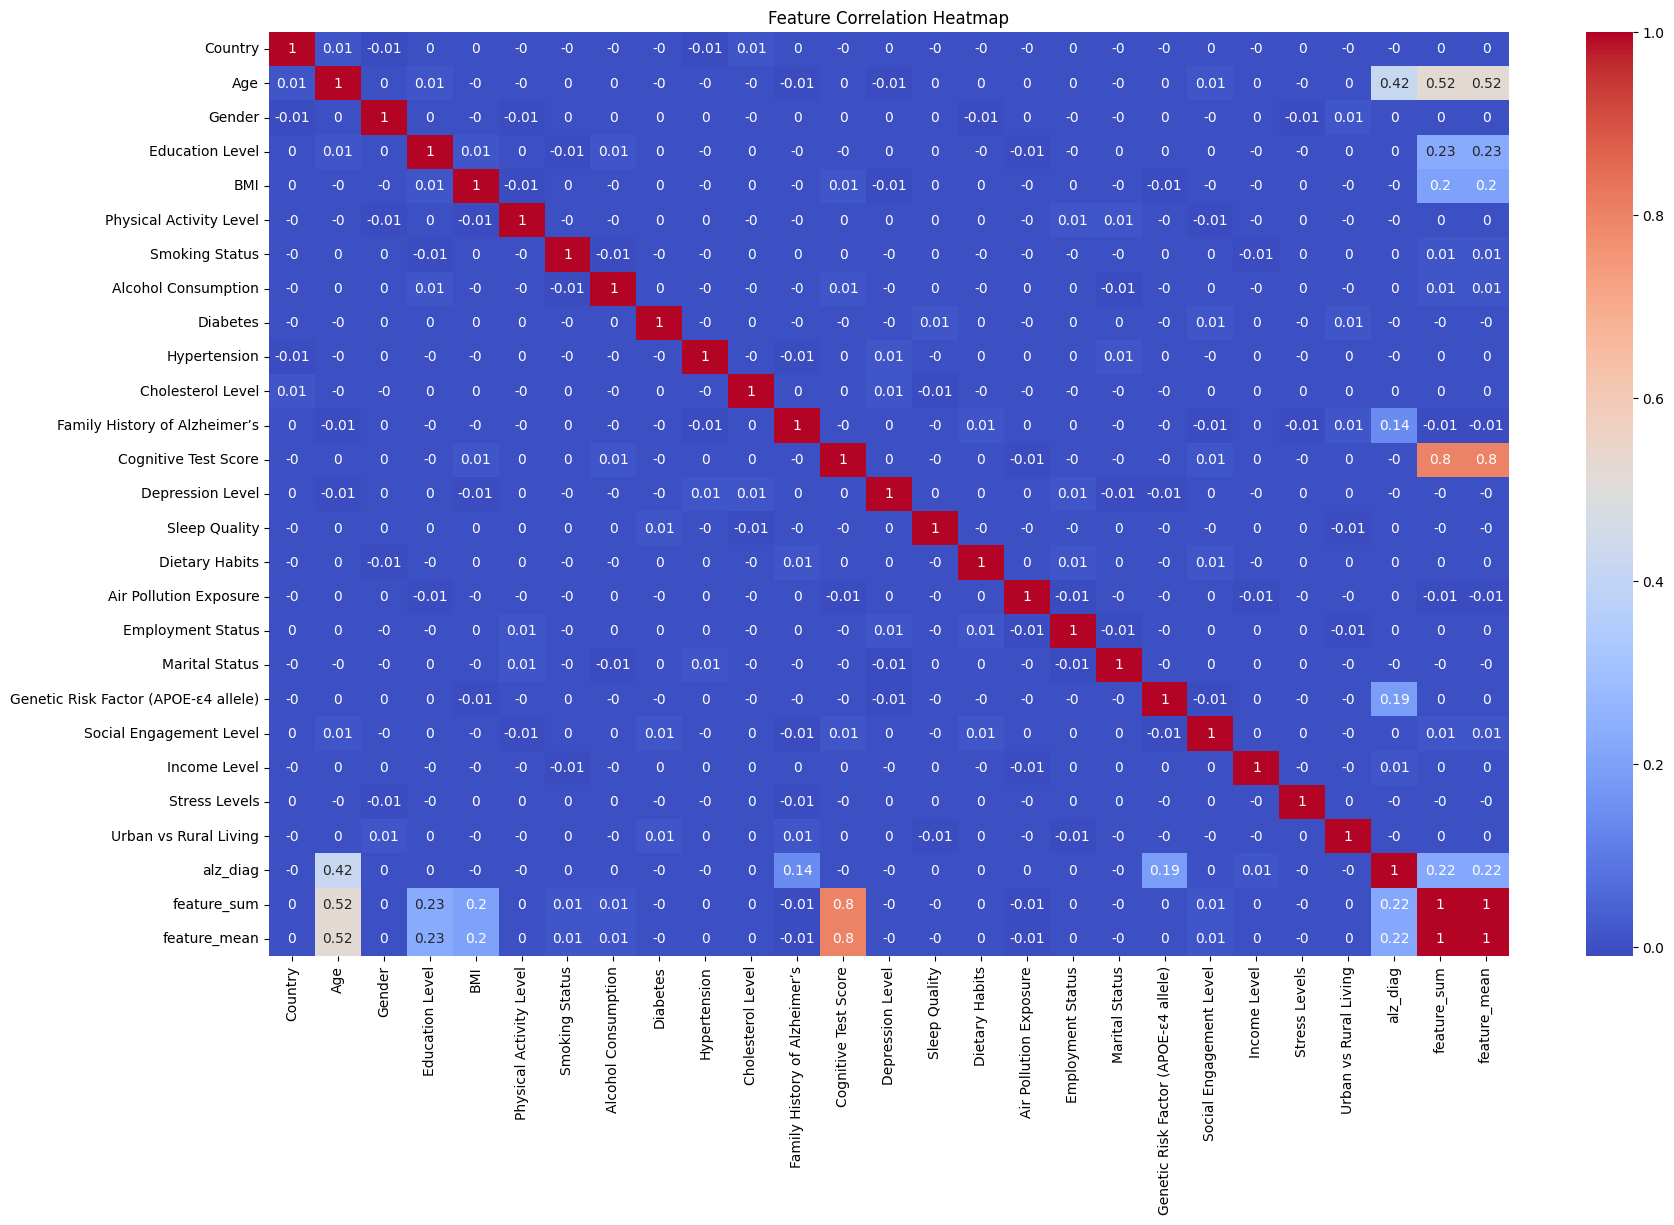

In [6]:
correlation_matrix = round(data.corr(), 2)
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
threshold = 0.05
high_corr_features = correlation_matrix.index[abs(correlation_matrix['alz_diag']) > threshold].tolist()
high_corr_features.remove('alz_diag')

print('Selected features based on correlation with target:', high_corr_features)

Selected features based on correlation with target: ['Age', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)', 'feature_sum', 'feature_mean']


In [8]:
X = data[high_corr_features]
y = data['alz_diag']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, shuffle=True, random_state=42)

In [9]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
print("Logistic Regression Training Accuracy:", log_model.score(X_train, y_train))
print("Logistic Regression Testing Accuracy:", log_model.score(X_test, y_test))
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Training Accuracy: 0.7102615016995928
Logistic Regression Testing Accuracy: 0.711651073568015
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      8719
           1       0.67      0.60      0.63      6138

    accuracy                           0.71     14857
   macro avg       0.70      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857



In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73      8719
           1       0.61      0.57      0.59      6138

    accuracy                           0.67     14857
   macro avg       0.66      0.65      0.66     14857
weighted avg       0.67      0.67      0.67     14857



In [11]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      8719
           1       0.63      0.63      0.63      6138

    accuracy                           0.70     14857
   macro avg       0.69      0.69      0.69     14857
weighted avg       0.70      0.70      0.70     14857



In [12]:
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      8719
           1       0.65      0.71      0.68      6138

    accuracy                           0.72     14857
   macro avg       0.72      0.72      0.72     14857
weighted avg       0.73      0.72      0.72     14857



In [13]:
rf_model = RandomForestClassifier(n_estimators=150, max_depth=12, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      8719
           1       0.65      0.71      0.68      6138

    accuracy                           0.72     14857
   macro avg       0.72      0.72      0.72     14857
weighted avg       0.73      0.72      0.72     14857



In [14]:
model_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

In [16]:
print("Model Accuracy Comparison:")
for model, score in model_scores.items():
    print(f"{model}: {score:.2f}")

Model Accuracy Comparison:
Logistic Regression: 0.71
KNN: 0.67
Naive Bayes: 0.70
Decision Tree: 0.72
Random Forest: 0.72


In [17]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7063 - loss: 0.5589 - val_accuracy: 0.7208 - val_loss: 0.5428
Epoch 2/40
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7189 - loss: 0.5450 - val_accuracy: 0.7199 - val_loss: 0.5420
Epoch 3/40
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7209 - loss: 0.5451 - val_accuracy: 0.7231 - val_loss: 0.5411
Epoch 4/40
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7233 - loss: 0.5422 - val_accuracy: 0.7207 - val_loss: 0.5407
Epoch 5/40
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7249 - loss: 0.5399 - val_accuracy: 0.7192 - val_loss: 0.5391
Epoch 6/40
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7203 - loss: 0.5448 - val_accuracy: 0.7208 - val_loss: 0.5403
Epoch 7/40
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7252 - loss: 0.5405 - val_accuracy: 0.7217 - val_loss: 0.5389
Epoch 8/40
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7261 - loss: 0.5388 - 

In [18]:
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

predictions = nn_model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7255 - loss: 0.5311  
Test Loss: 0.5331
Test Accuracy: 72.32%
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step


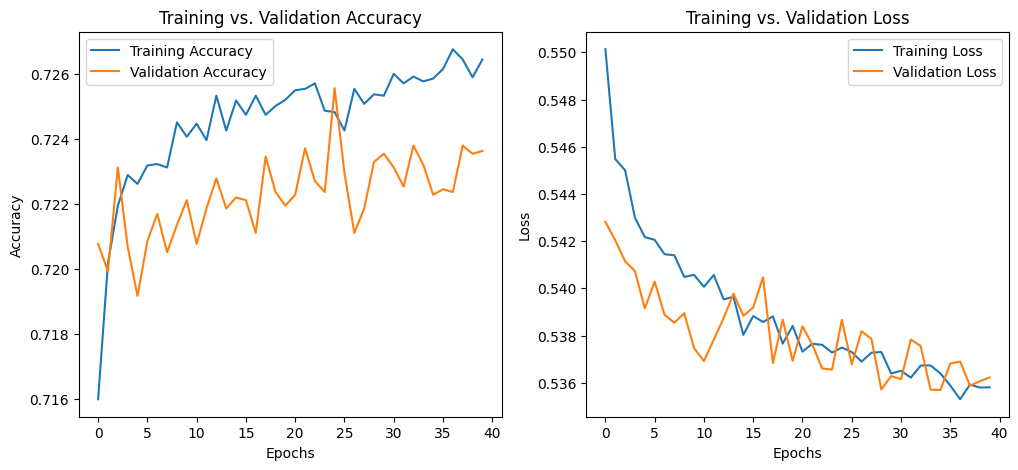

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()